In [1]:
using Distances
using DataFrames
using Random
using LightGraphs
using GraphPlot
# using Graphs

using Plots
using WebIO

using Eirene

using DelimitedFiles

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/689c25549e9167a2e65f44c1dd863f7a1e43ce57-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/689c25549e9167a2e65f44c1dd863f7a1e43ce57-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

# Generation of geometric matrix
Geometric matrices were obtained by sampling a set of N i.i.d. points were then given by Cij = −||pi − pj||, where the minus sign ensures that they monotonically uniformly distributed in the d-dimensional unit cube [0, 1]d ⊂ Rd, for d ≤ N. The matrix entries decrease with distance, as expected for geometrically organized correlations.

collection of points embedded in some Euclidean space ->  negative distance matrix -> geometric order complex

In [2]:
# Each column is a point, each row n is coordinate in the n-th dimension 
dimensions = 20
N = 88
random_points = rand(Float64, dimensions, N)

20×88 Array{Float64,2}:
 0.580964   0.447392   0.986844   …  0.0589877   0.693097   0.120644  
 0.701661   0.32547    0.452068      0.0705559   0.782148   0.0961637 
 0.136793   0.617929   0.0358717     0.996773    0.0174943  0.803347  
 0.213282   0.709106   0.523546      0.193693    0.407748   0.0172148 
 0.80272    0.0570932  0.854209      0.796072    0.34053    0.29706   
 0.767008   0.645717   0.297962   …  0.537985    0.508536   0.786378  
 0.65627    0.0490499  0.560101      0.109003    0.17001    0.351228  
 0.0554944  0.382678   0.316154      0.703132    0.793479   0.0302274 
 0.678773   0.0992727  0.938837      0.723797    0.996824   0.00918564
 0.749514   0.428082   0.548866      0.344472    0.357012   0.0517613 
 0.504707   0.421112   0.312595   …  0.286704    0.963703   0.867958  
 0.119732   0.290912   0.656508      0.245107    0.548497   0.532044  
 0.551296   0.667311   0.822005      0.349629    0.990284   0.268428  
 0.799125   0.199541   0.83352       0.357102    0.22

In [3]:
# ezplot_pjs(unit_cube)

### Computing distance between casted points stored in "random_points"

In [4]:
geometric_matrix = pairwise(Euclidean(), random_points, dims=2)
geometric_matrix = -geometric_matrix;


88×88 Array{Float64,2}:
 -0.0      -1.73724  -1.15786  -1.78654  …  -2.19212  -1.78128  -2.13254
 -1.73724  -0.0      -1.7676   -1.84295     -1.93784  -1.91699  -1.58323
 -1.15786  -1.7676   -0.0      -1.77713     -2.25856  -1.74121  -2.37453
 -1.78654  -1.84295  -1.77713  -0.0         -2.11343  -1.61022  -2.04975
 -1.93164  -1.61808  -1.97223  -1.69429     -1.55617  -1.95308  -1.41065
 -1.6532   -1.61238  -1.56468  -1.86229  …  -1.75214  -2.3598   -1.77526
 -1.64215  -1.49309  -1.67973  -1.95225     -2.12671  -2.07864  -2.22174
 -2.00492  -1.82467  -1.62492  -1.97038     -2.21642  -2.10598  -2.30913
 -1.48413  -1.63808  -1.27678  -1.7853      -2.16856  -2.31722  -1.98225
 -1.90368  -1.7596   -1.62204  -1.63538     -1.96607  -1.93083  -1.98383
 -2.02902  -1.53732  -1.82227  -1.86144  …  -1.98061  -2.19405  -2.0855 
 -1.98794  -1.90573  -1.76393  -1.45305     -2.04018  -1.98492  -1.75254
 -1.67103  -1.8326   -1.53623  -1.85005     -1.78557  -1.99702  -1.93128
  ⋮                        

In [5]:
# Shuffled matrix
indicies_collection = findall(x->x<0, geometric_matrix) 
# indicies_collection = findall(x->x>0, geometric_matrix) 
# Shuffle the indicies
rand!(indicies_collection, indicies_collection)

shuffeled_matrix = copy(geometric_matrix)

# Swap the elements
n=1
for k in 1:N
    for m in k+1:N
        a = indicies_collection[n][1]
        b = indicies_collection[n][2]
        shuffeled_matrix[k,m] = geometric_matrix[a,b]
        shuffeled_matrix[m,k] = geometric_matrix[b,a]
        
        shuffeled_matrix[a,b] = geometric_matrix[k,m]
        shuffeled_matrix[b,a] = geometric_matrix[m,k]
        
        n +=1
    end
end

In [6]:
elemnts_above_diagonal = Int((N^2-N)/2)

random_matrix = zeros(size(geometric_matrix))

set_of_random_numbers = rand(elemnts_above_diagonal)

h = 1
for k in 1:N
    for m in k+1:N
        random_matrix[k,m] = set_of_random_numbers[h]
        random_matrix[m,k] = set_of_random_numbers[h]
        h +=1
    end
end



88×88 Array{Float64,2}:
 0.0         0.387154   0.689747   …  0.514254   0.390768   0.54802  
 0.387154    0.0        0.984568      0.436541   0.243102   0.117449 
 0.689747    0.984568   0.0           0.273744   0.617945   0.178047 
 0.705627    0.875611   0.235082      0.717837   0.225689   0.780583 
 0.729829    0.589166   0.994197      0.886552   0.270675   0.36738  
 0.362536    0.950321   0.346055   …  0.366211   0.507441   0.144364 
 0.767763    0.783267   0.702259      0.56456    0.151297   0.691599 
 0.546599    0.559693   0.0760486     0.0404651  0.744368   0.568005 
 0.268292    0.35451    0.424686      0.724367   0.558931   0.642161 
 0.904543    0.462595   0.641799      0.106343   0.232539   0.650894 
 0.00721016  0.535509   0.364421   …  0.940603   0.616314   0.426559 
 0.145357    0.851519   0.897388      0.288499   0.733672   0.257757 
 0.430987    0.956675   0.0730191     0.664753   0.744494   0.672311 
 ⋮                                 ⋱  ⋮                           

In [7]:
# Save Matricies to csv files

writedlm( "geometric_matrix.csv",  geometric_matrix, ',')
writedlm( "shuffeled_matrix.csv",  shuffeled_matrix, ',')
writedlm( "random_matrix.csv",  random_matrix, ',')

In [58]:
geom_eirene = eirene(-geometric_matrix, model="vr", maxdim=3)
# geometric_matrix

88×88 Array{Float64,2}:
 -0.0      -1.77037  -1.93921  -1.54799  …  -1.86932  -1.45716  -2.00171
 -1.77037  -0.0      -2.08066  -1.76448     -1.9743   -1.52182  -1.92827
 -1.93921  -2.08066  -0.0      -1.81642     -1.45966  -1.67875  -1.53415
 -1.54799  -1.76448  -1.81642  -0.0         -2.27354  -1.77094  -1.75171
 -2.3167   -1.827    -1.97984  -1.99551     -2.16641  -1.86344  -1.91701
 -2.25573  -1.72064  -2.24119  -2.04747  …  -2.0262   -1.91682  -1.98188
 -1.97522  -1.37273  -2.22924  -2.15296     -2.06587  -1.76702  -1.99936
 -1.94347  -1.5351   -1.7105   -1.76848     -1.7947   -1.63378  -1.93706
 -2.03757  -1.42254  -1.91737  -1.70013     -1.76588  -1.86548  -1.59327
 -1.98665  -1.75215  -1.6233   -2.04512     -1.98303  -1.49655  -1.75892
 -1.65447  -1.58072  -2.09198  -1.67441  …  -2.00071  -1.84041  -2.11943
 -1.34833  -1.48906  -1.9954   -1.65129     -1.82468  -1.4571   -1.90222
 -2.0521   -1.41336  -2.3874   -1.76149     -2.65098  -2.05977  -2.02219
  ⋮                        

In [52]:
shuffled_eirene = eirene(-shuffeled_matrix, model="vr", maxdim=3)
random_eirene= eirene(random_matrix, model="vr", maxdim=3)

Dict{String,Any} with 12 entries:
  "symmat"   => [3621 2587 … 1221 1752; 2587 3621 … 949 1779; … ; 1221 949 … 36…
  "maxnz"    => [0, 1527, 54916, 1183805, 18138644, 0]
  "firstv"   => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  80, 81, 82, 8…
  "cyclerep" => Array{Array{Int64,1},1}[[], [[3, 5], [11, 36], [6, 13], [19, 71…
  "phi"      => Array{Int64,1}[[], [175, 850, 432, 1465, 767, 1813, 2955, 1101,…
  "plo"      => Array{Int64,1}[[], [5, 36, 13, 71, 30, 26, 76, 62, 53, 52  …  1…
  "ocg2rad"  => [Inf, 0.946588, 0.945369, 0.945291, 0.945001, 0.944937, 0.94463…
  "farfaces" => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  79, 80, 81, 8…
  "nvl2ovl"  => [47, 72, 1, 2, 79, 82, 30, 5, 19, 57  …  55, 10, 76, 31, 51, 48…
  "input"    => Dict{String,Any}("genera"=>[0.0 0.726778 … 0.714359 0.0585805; …
  "tid"      => Array{Int64,1}[[], [5, 36, 13, 71, 30, 26, 76, 62, 53, 52  …  1…
  "grain"    => Array{Int64,1}[[3621, 3621, 3621, 3621, 3621, 3621, 3621, 3621,…

In [53]:
# Get the betti curves f
dimen = 1

# Geomteric
geom_betti1 = betticurve(geom_eirene, dim=1)
geom_betti = zeros(size(geom_betti1)[1], 3+1)
geom_betti[:,1] = geom_betti1[:,1] 
for k in 1:3
    geom_betti[:,k+1] = betticurve(geom_eirene, dim=k)[:,2]
end

# Shuffle
shuffled_betti1 = betticurve(shuffled_eirene, dim=1)
shuffled_betti = zeros(size(shuffled_betti1)[1], 3+1)
shuffled_betti[:,1] = shuffled_betti1[:,1] 
for k in 1:3
    shuffled_betti[:,k+1] = betticurve(shuffled_eirene, dim=k)[:,2]
end

# Random
random_betti1 = betticurve(random_eirene, dim=1)
random_betti = zeros(size(random_betti1)[1], 3+1)
random_betti[:,1] = random_betti1[:,1] 
for k in 1:3
    random_betti[:,k+1] = betticurve(random_eirene, dim=k)[:,2]
end

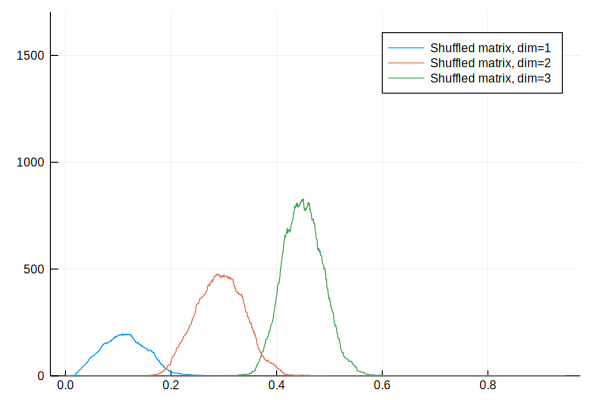

In [54]:
matrix = random_betti
maxy = findmax(matrix[:,4])[2]

plot(matrix[:,1], matrix[:,2], label="Shuffled matrix, dim=1", ylims = (0,maxy))
plot!(matrix[:,1], matrix[:,3], label="Shuffled matrix, dim=2")
plot!(matrix[:,1], matrix[:,4], label="Shuffled matrix, dim=3")

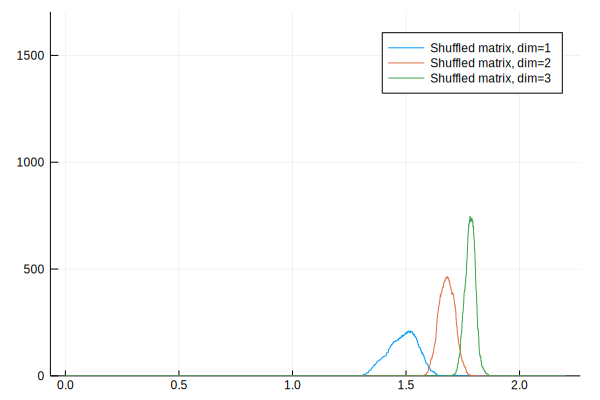

In [55]:
matrix = shuffled_betti
plot(matrix[:,1], matrix[:,2], label="Shuffled matrix, dim=1", ylims = (0,maxy))
plot!(matrix[:,1], matrix[:,3], label="Shuffled matrix, dim=2")
plot!(matrix[:,1], matrix[:,4], label="Shuffled matrix, dim=3")

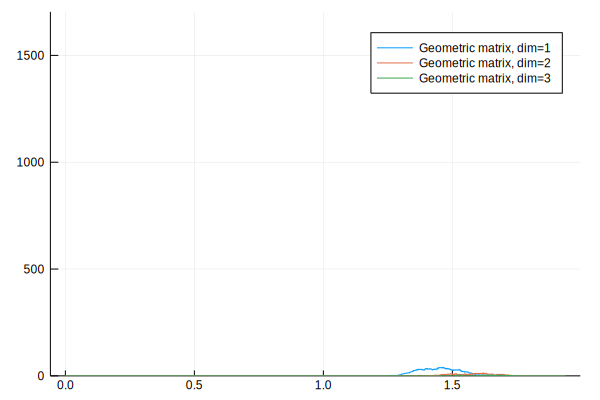

In [59]:
matrix = geom_betti
plot(matrix[:,1], matrix[:,2], label="Geometric matrix, dim=1", ylims = (0,maxy))
plot!(matrix[:,1], matrix[:,3], label="Geometric matrix, dim=2")
plot!(matrix[:,1], matrix[:,4], label="Geometric matrix, dim=3")
# xaxis_range = [0,120]

In [43]:
dimen = 2

plot_shuffle = true
plot_geom = !plot_shuffle

plot_betti = false
plot_persistance = false
plot_bar = true

if plot_geom
    if plot_betti
        plotbetticurve_pjs(geom_eirene, dim=dimen)
    elseif plot_persistance
        plotpersistencediagram_pjs(geom_eirene,dim=dimen)
    elseif plot_bar
        plotbarcode_pjs(geom_eirene,dim=0:dimen)
    end
elseif plot_shuffle
        if plot_betti
        plotbetticurve_pjs(shuffled_eirene, dim=dimen)
    elseif plot_persistance
        plotpersistencediagram_pjs(shuffled_eirene,dim=dimen)
    elseif plot_bar
        plotbarcode_pjs(shuffled_eirene,dim=0:dimen)
    end
end


data: [
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields line, mode, showlegend, type, x, and y",
  "scatter with fields l

### Creating matrix ordering "matrix_ordering" of matrix "geometric_matrix"

Find the maximum value, return indicies, remove it, repeat until all are 0.0, inverse matrix.

First element in "matrix ordering" is of lowest value.

(The indexing is inversed in comparison to the article)

In [15]:
# How many elements above diagonal are in matrix?
elemnts_above_diagonal = Int((N^2-N)/2)

matrix_ordering = zeros(Int, 2,elemnts_above_diagonal)

A = copy(geometric_matrix)

k=1

for element in range(1,stop=elemnts_above_diagonal)
#     Find maximal distance
    maximal_value = findmax(A)
#     Get the coordinates
    matrix_ordering[1,k] = Int(maximal_value[2][1])
    matrix_ordering[2,k] = Int(maximal_value[2][2])

#     Zero maxval in A (above and below diagonal) so next maxval can be found
    A[matrix_ordering[1,k], matrix_ordering[2,k]] = 0.0
    A[matrix_ordering[2,k], matrix_ordering[1,k]] = 0.0
    
    k+=1
end

# 

matrix_ordering= matrix_ordering[:,end:-1:1]

2×1225 Array{Int64,2}:
 49  49  42  31  41  22  32  37  33  …  17  50  14  29  12  12  22  44  12
 31   5  16   5  38  20  31  16   2     12   8   4   5   8   4   4   8   5

## Create nested graph
There is as much graphs as there is random indicies=N

In [16]:
# Each vertex is the column, because columns represent different elements, between which distance was measured
vetrices = N # 

# Edges are created between every points up to the level k
edges = matrix_ordering
num_of_edges = size(edges)[2]

# g = SimpleGraph(vetrices);

set_of_graphs = [a=Graph(vetrices) for a=1:num_of_edges]
edges_counter = zeros(Int, num_of_edges)
edge_density =  zeros(num_of_edges)

k=1
for k in range(1,stop=num_of_edges)~
#     set_of_graphs[k]
    add_edge!(set_of_graphs[k], edges[1,k], edges[2,k]);
    edges_counter[k] = ne(set_of_graphs[k])
    edge_density[k] = edges_counter[k]/binomial(N,2)
    if k<num_of_edges 
        set_of_graphs[k+1] = copy(set_of_graphs[k])
    end
end

Number of edges: 
300
Edge density: 
0.24489795918367346


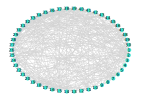

In [17]:
n=300

nodelabel = [r  for r in 1:nv(set_of_graphs[n])]
println("Number of edges: ")
println(edges_counter[n])

println("Edge density: ")
println(edge_density[n])

gplot(set_of_graphs[n], layout=circular_layout, nodelabel=nodelabel)

# Compute Betti curve for matrix_ordering

In [46]:
using Eirene
using SparseArrays

## "point cloud" mode

In [47]:
ezplot_pjs(matrix_ordering[:,1:500])

data: [
  "scatter with fields autocolorscale, marker, mode, type, x, and y"
]

layout: "layout with fields height, hovermode, margin, scene, showlegend, and width"

In [48]:
C = eirene(matrix_ordering[:,1:500],maxdim=2, maxrad=20,model="pc")

Dict{String,Any} with 12 entries:
  "symmat"   => [146 144 … 0 0; 144 146 … 0 0; … ; 0 0 … 146 145; 0 0 … 145 146]
  "maxnz"    => [0, 20009, 1826822, 70647601, 0]
  "firstv"   => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  492, 493, 494…
  "cyclerep" => Array{Array{Int64,1},1}[[], [[4, 5], [4, 9], [8, 14], [8, 19], …
  "phi"      => Array{Int64,1}[[], [1155, 1532, 2659, 4862, 26544, 29334, 19753…
  "plo"      => Array{Int64,1}[[], [5, 9, 14, 19, 97, 93, 72, 43, 52, 42  …  44…
  "ocg2rad"  => [20.0, 19.9249, 19.8494, 19.799, 19.7231, 19.6977, 19.6469, 19.…
  "farfaces" => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  491, 492, 493…
  "nvl2ovl"  => [424, 194, 414, 423, 463, 35, 5, 291, 284, 88  …  162, 411, 323…
  "input"    => Dict{String,Any}("genera"=>[46 29 … 50 26; 2 21 … 20 19],"time"…
  "tid"      => Array{Int64,1}[[], [5, 9, 14, 19, 97, 93, 72, 43, 52, 42  …  25…
  "grain"    => Array{Int64,1}[[146, 146, 146, 146, 146, 146, 146, 146, 146, 14…

In [49]:
plotpersistencediagram_pjs(C,dim=1)

data: [
  "scatter with fields hoverinfo, marker, mode, text, textfont, textposition, type, x, and y",
  "scatter with fields hoverinfo, marker, mode, text, textfont, textposition, type, x, and y"
]

layout: "layout with fields height, hovermode, margin, scene, showlegend, and width"

In [50]:
plotbetticurve_pjs(C, dim=1)

MethodError: MethodError: no method matching -(::Int64, ::Array{Int64,2})
Closest candidates are:
  -(::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) at int.jl:51
  -(::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}, !Matched::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:52
  -(::Union{Int16, Int32, Int64, Int8}, !Matched::BigInt) at gmp.jl:449
  ...

In [51]:
#1 D is created from matrix ordering
D = zeros(Int,N,N)

for k in range(1,stop=n) # n from the jupytrt cell in which graph is created 
# println(matrix_ordering[:,k])
    D[matrix_ordering[1,k], matrix_ordering[2,k]] += 1
    D[matrix_ordering[2,k], matrix_ordering[1,k]] += 1
end

# for row in eachrow(D)
#     println(row)
# end

# C = eirene(D,maxdim=3,model="vr")

In [52]:
# ezplot_pjs(set_of_graphs[n])

In [53]:
C = eirene(geometric_matrix,maxdim=2,model="vr")

Dict{String,Any} with 12 entries:
  "symmat"   => [1064 1031 … 118 1; 1031 1064 … 319 1; … ; 118 319 … 1064 1; 1 …
  "maxnz"    => [0, 447, 5271, 44721, 0]
  "firstv"   => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  42, 43, 44, 4…
  "cyclerep" => Array{Array{Int64,1},1}[[], [[11, 8], [13, 21], [2, 3], [13, 39…
  "phi"      => Array{Int64,1}[[], [325, 530, 50, 808, 303, 168, 22, 251, 204, …
  "plo"      => Array{Int64,1}[[], [8, 21, 3, 39, 31, 28, 23, 22, 19, 15  …  18…
  "ocg2rad"  => [Inf, 2.09964, 2.09905, 2.09877, 2.09855, 2.09854, 2.09772, 2.0…
  "farfaces" => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  41, 42, 43, 4…
  "nvl2ovl"  => [34, 2, 46, 43, 33, 13, 32, 21, 10, 18  …  40, 22, 11, 35, 49, …
  "input"    => Dict{String,Any}("genera"=>[0.0 1.69906 … 1.95816 1.81513; 1.69…
  "tid"      => Array{Int64,1}[[], [8, 21, 3, 39, 31, 28, 23, 22, 19, 15  …  27…
  "grain"    => Array{Int64,1}[[1064, 1064, 1064, 1064, 1064, 1064, 1064, 1064,…

In [54]:
# plotbarcode_pjs(C,dim=0:1)
plotpersistencediagram_pjs(C,dim=1)

data: [
  "scatter with fields hoverinfo, marker, mode, text, textfont, textposition, type, x, and y",
  "scatter with fields hoverinfo, marker, mode, text, textfont, textposition, type, x, and y"
]

layout: "layout with fields height, hovermode, margin, scene, showlegend, and width"

In [55]:
plotbetticurve_pjs(C, dim=2)

MethodError: MethodError: no method matching -(::Int64, ::Array{Int64,2})
Closest candidates are:
  -(::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) at int.jl:51
  -(::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}, !Matched::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:52
  -(::Union{Int16, Int32, Int64, Int8}, !Matched::BigInt) at gmp.jl:449
  ...

### "complex mdoe"
Suppose that G is the last in a nested sequence of graphs G1, G2, G3.

G1 is just the vertex v1 and G2 is the (unconnected) pair of vertices v1, v2.

1. let D be the N x N zero/one matrix with D[i,j] = 1 iff i is a face of cell j
2. S  = sparse(D)
3. rv = S.rowval
4. cp = S.colptr

5. dv[i] is the dimension of cell i
6. ev[k] is the total number of cells with dimension k-1
7. dp[k] is 1 plus the number of cells of dimension strictly less than k-1
8. If in addition we have a nested sequence of complexes E_0 ≤ ... ≤ E_n = E, then let fv be the vector such that

    fv[i] is the birthtime of cell i

#### model="complex" is useless because not a single example works in this mode
- at line 2716 there are errors in indexing

In [56]:
#1 D is created from matrix ordering
D = zeros(Int,N,N)

for k in range(1,stop=n) # n from the jupytrt cell in which graph is created 
# println(matrix_ordering[:,k])
    D[matrix_ordering[1,k], matrix_ordering[2,k]] = 1
    D[matrix_ordering[2,k], matrix_ordering[1,k]] = 1
end

for row in eachrow(D)
    println(row)
end

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [57]:
# NOT WORKING MODE

# fv = [0.1*a for a in 1:n]

# S = sparse(D)
# rv = S.rowval
# cp = S.colptr

# dv = [0,1]
# ev = [1,1]

# # C = eirene(model="complex", rv=rv,cp=cp,fv=fv, ev=ev, maxdim=1)
# C = eirene(model="complex", rv=rv,cp=cp,fv=fv, dv=dv, maxdim=1)
# # keyword input <rv> is a vector, and none of <dv>, <dp>, and <ev> is nonempty

In [58]:
# 2, 3, 4
S = sparse(D)
rv = S.rowval
cp = S.colptr

rv = [1,2]
cp = [1,1,3]

3-element Array{Int64,1}:
 1
 1
 3

In [59]:
# 5-> all the cells are in 2 dimension the number of cells does not change
dv = [0,0,1]#ones(Int, N) .* 2
 
# 6 -> the number of cells does not change
ev = [2,1,0]

# 7
dp = [1,2,4,4]

# 8  but might be set to either edge density or just sequence 1:number_of_edges
fv = [0.1*a for a in a:n]  #[a for a in 0.01:0.01:0.2]

# C = eirene(rv=rv,cp=cp, fv=fv, dp=dp, maxdim=1)
C = eirene(rv=rv,cp=cp,dv=dv,fv=fv)

#  C = eirene("/home/ed19aaf/Programming/Julia/Eirene/ez.csv",model="complex",entryformat="sp")
# C =eirene("/home/ed19aaf/Programming/Julia/Eirene/ez.csv",model="complex",  entryformat=  "dp")

UndefVarError: UndefVarError: a not defined

In [60]:
plotbetticurve_pjs(C, dim=1)

MethodError: MethodError: no method matching -(::Int64, ::Array{Int64,2})
Closest candidates are:
  -(::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) at int.jl:51
  -(::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}, !Matched::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:52
  -(::Union{Int16, Int32, Int64, Int8}, !Matched::BigInt) at gmp.jl:449
  ...